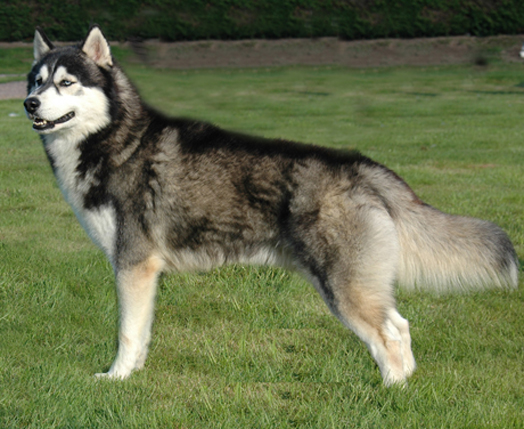

(524, 429)
C:\Users\dj\Anaconda3\lib\site-packages\torch\nn\functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
C:\Users\dj\Anaconda3\lib\site-packages\torch\nn\functional.py:2494: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


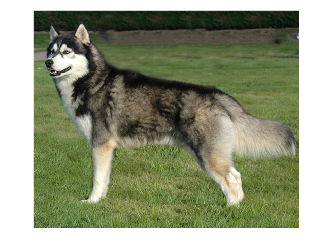

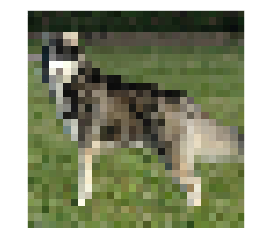

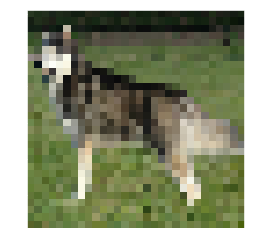

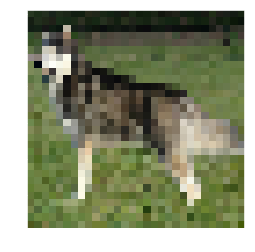

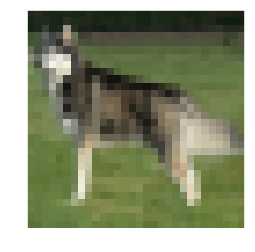

In [4]:
%matplotlib inline
import PIL    
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.nn.functional as F

def display3(t=None):
        'display 3 channel tensor image' 
        
        if not torch.is_tensor(t):
            t = torch.ones(256,256,3)*0.5 # gray box

        t= torch.squeeze(t)    

        l = len(t.size())    

        if l>4 or l<3:
            return NotImplemented

        if l==4:
            t = t[0]

        l = len(t.size())

        if l==3:
            if t.size(0)==3:
                t = t.permute(1,2,0)

        plt.imshow(t)
        plt.show()
        plt.close()
        
# open the image
url = "https://raw.githubusercontent.com/dejanbatanjac/pytorch-learning-101/master/h.jpg"
from PIL import Image
import requests

img = Image.open(requests.get(url, stream = True).raw)
display(img) 
print(img.size)

ToTensor = torchvision.transforms.ToTensor()
t = ToTensor(img)

a = t[None]
display3(a)
b = F.interpolate(a, size=(30,30), scale_factor=None, mode='nearest', align_corners=None)
display3(b)
b = F.interpolate(a, size=30, scale_factor=None, mode='bilinear', align_corners=None)
display3(b)
b = F.interpolate(a, size=30, scale_factor=None, mode='bicubic', align_corners=None)
display3(b)
b = F.interpolate(a, size=30, scale_factor=None, mode='area', align_corners=None)
display3(b)

#'nearest' | 'linear' | 'bilinear' | 'bicubic' | 'trilinear' | 'area'. Default: 'nearest